# One-Class SVM

## Import Libraries

In [48]:
from sklearn.svm import OneClassSVM
import sys

## Import Functions

In [49]:
# path to functions
sys.path.insert(0, '../../src')

# import functions
import model_functions as mf

## Load Data

In [50]:
X, x_test = mf.load_data()
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22530 entries, 0 to 22529
Columns: 375 entries, TransactionID to D15_to_std_addr2
dtypes: float64(375)
memory usage: 64.5 MB


# Base Model

Run Time:

In [51]:
# Define the parameter grid
param_grid = {
    'kernel': ['rbf', 'sigmoid'],
    'nu': [0.01, 0.1],
    'gamma': ['scale']
}

# grid search
best_params_bm = mf.hyper_tuning(OneClassSVM, param_grid, X)

# best parameters
print(best_params_bm)

/home/ndressler/.pyenv/versions/3.10.6/envs/financial_fraud/lib/python3.10/site-packages/sklearn/metrics/_scorer.py:548: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


/home/ndressler/.pyenv/versions/3.10.6/envs/financial_fraud/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ndressler/.pyenv/versions/3.10.6/envs/financial_fraud/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 980, in _score
    scores = scorer(estimator, X_test, **score_params)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/home/ndressler/.pyenv/versions/3.10.6/envs/financial_fraud/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ndressler/.pyenv/versions/3.10.6/envs/financial_fraud/lib/python3.10/site-packages/sklearn/model_s

{'gamma': 'scale', 'kernel': 'rbf', 'nu': 0.01}


In [52]:
# initialize the model with the best parameters
base_model = OneClassSVM(**best_params_bm)

# train the model
base_model.fit(X)

OneClassSVM(nu=0.01)

In [53]:
# evaluate the model
sil_score_bm, db_score_bm, ch_score_bm, anomaly_scores_bm, score_bm = mf.evaluate_model(base_model, X)

In [54]:
# print metrics evaluation
mf.show_metrics(sil_score_bm, db_score_bm, ch_score_bm, score_bm, 'Base Model')

Silhouette Score of Base Model: 0.8839306977967717
Davies-Bouldin Score of Base Model: 1.6021503750887485
Calinski-Harabasz Score of Base Model: 2720.5192431548912
Score of Base Model: 0.23051523571279992


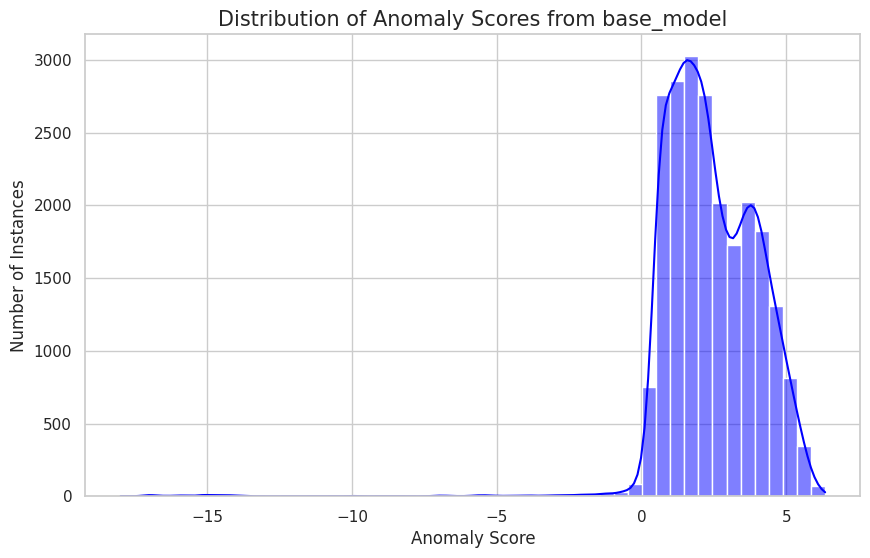

In [55]:
# plot the histogram of the anomaly scores
mf.plot_hist('ocsvm', anomaly_scores_bm, 'base_model')

# Model 1

## Hyperparameter Tunning

In [56]:
# Define the parameter grid
param_grid = {
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'nu': [0.01, 0.05, 0.1, 0.15, 0.2],
    'gamma': ['scale', 'auto']
}

# grid search
best_params_m1 = mf.hyper_tuning(OneClassSVM, param_grid, X)

# best parameters
print(best_params_m1)

/home/ndressler/.pyenv/versions/3.10.6/envs/financial_fraud/lib/python3.10/site-packages/sklearn/metrics/_scorer.py:548: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(
/home/ndressler/.pyenv/versions/3.10.6/envs/financial_fraud/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ndressler/.pyenv/versions/3.10.6/envs/financial_fraud/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 980, in _score
    scores = scorer(estimator, X_test, **score_params)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/home/ndressler/.pyenv/versions/3.10

{'gamma': 'scale', 'kernel': 'rbf', 'nu': 0.01}


## Train Model

In [57]:
# initialize the model with the best parameters
model_1 = OneClassSVM(**best_params_m1)

# train the model
model_1.fit(X)

OneClassSVM(nu=0.01)

## Evaluation

In [58]:
sil_score_m1, db_score_m1, ch_score_m1, anomaly_scores_m1, score_m1 = mf.evaluate_model(model_1, X)

### Scores

In [59]:
mf.show_metrics(sil_score_m1, db_score_m1, ch_score_m1, score_m1, 'Model 1')

Silhouette Score of Model 1: 0.8839306977967717
Davies-Bouldin Score of Model 1: 1.6021503750887485
Calinski-Harabasz Score of Model 1: 2720.5192431548912
Score of Model 1: 0.23051523571279992


### Anomaly Score Distribution

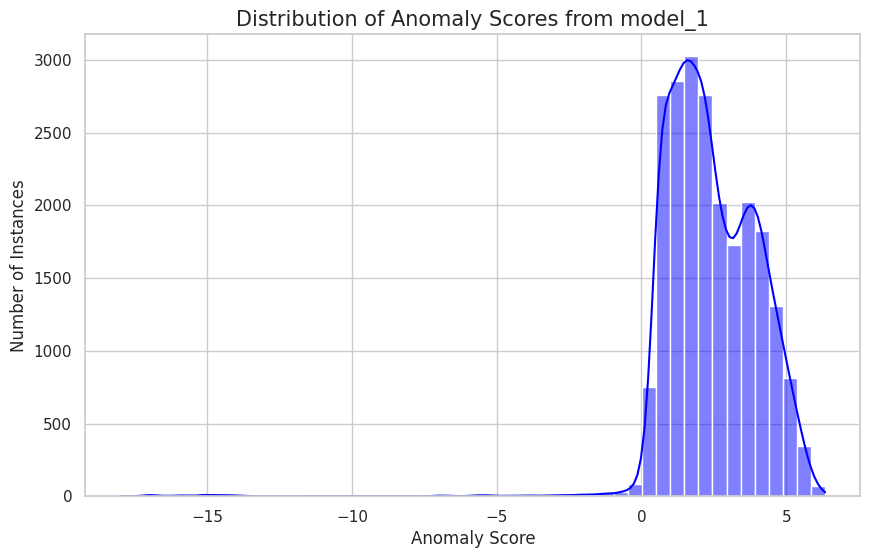

In [60]:
# plot the histogram of the anomaly scores
mf.plot_hist('ocsvm', anomaly_scores_m1, 'model_1')